In [1]:
import pandas as pd
import numpy as np

np.random.seed(0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay, precision_recall_fscore_support

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
invasion = pd.read_csv('data/invasion.csv')

In [3]:
invasion['class'].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [4]:
cl = pd.DataFrame({'class': ['transport', 'fighter', 'cruiser'],
                   'value': [0, 1, 2]})

In [5]:
cl

,class,value
0,transport,0
1,fighter,1
2,cruiser,2


In [6]:
invasion

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [7]:
invasion = invasion.merge(cl, on='class', how='left')

In [8]:
invasion

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume,value
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446,0
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300,0
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467,0
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865,1
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806,1
...,...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909,1
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551,0
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203,1
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809,1


In [9]:
X_train = invasion.drop(['class','value'], axis=1)
y_train = invasion.value

In [10]:
X_train.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [11]:
y_train

0      0
1      0
2      0
3      1
4      1
      ..
495    1
496    0
497    1
498    1
499    0
Name: value, Length: 500, dtype: int64

In [12]:
clf_rf = RandomForestClassifier()

In [13]:
params = {
    'n_estimators': range(10, 100, 10),
    'max_depth':range(1, 11, 2),
    'min_samples_leaf': range(1, 10),
    'min_samples_split': range(2, 10, 2)
}

In [14]:
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=5, n_jobs=-1)

In [15]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 11, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 100, 10)})

In [16]:
grid_search_cv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [17]:
imp = pd.DataFrame(grid_search_cv_clf.best_estimator_.feature_importances_, index=X_train.columns, columns=['importance'])

<Axes: >

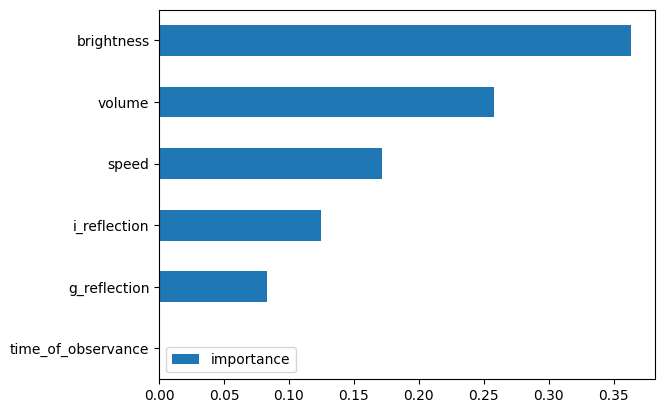

In [18]:
imp.sort_values('importance').plot.barh()

In [19]:
X_test = pd.read_csv('data/operative_information.csv')

In [20]:
X_test

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813
...,...,...,...,...,...,...
1495,11.755466,5.583147,325.069957,0.170644,388400,13.210917
1496,12.220137,4.023177,439.975574,0.163958,195305,13.819358
1497,1.611053,7.864930,65.025106,0.430021,307856,47.369083
1498,7.114131,5.532188,391.178342,0.150117,51590,12.447761


In [22]:
pred = grid_search_cv_clf.best_estimator_.predict(X_test)

In [27]:
pd.Series(pred).value_counts()

1    675
0    595
2    230
dtype: int64

In [28]:
df = pd.read_csv('big_data/space_can_be_a_dangerous_place.csv')

In [29]:
df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


<Axes: >

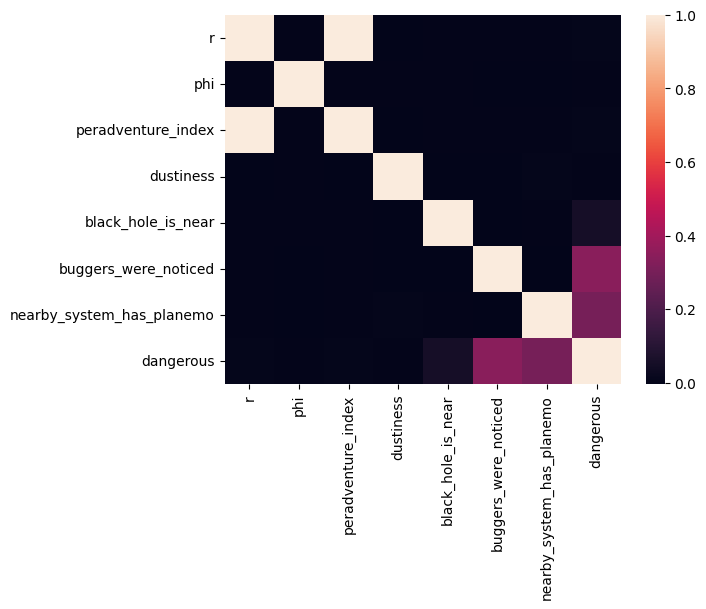

In [32]:
sns.heatmap(df.corr())